In [175]:
import pandas as pd
import matplotlib.pyplot as mltp
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import sklearn as sk
import seaborn as sea
import re 
import tqdm

#df=pd.read_csv('data/blogtext.csv')

https://towardsdatascience.com/my-first-nlp-pipeline-99d24aafb773

In [20]:
nltk.app.srparser()

In [187]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/niclascramer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
col=df.columns.to_list()
col

In [ ]:
df['gender'].value_counts()

In [ ]:
df['age'].value_counts()

In [ ]:
df['topic'].value_counts()

In [ ]:
df['sign'].value_counts()

In [ ]:
df['date'].value_counts()

## Data Pipline

### Preprocessing 

In [ ]:
df.head(10)

In [ ]:
df['text']=df['text'].apply(lambda x:x.lower())

In [ ]:
df.head(10)

In [ ]:
df['text'][0]

In [164]:
df_pip=df.copy()
df_pip


,id,gender,age,topic,sign,date,text,lang,language_2
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",en,en
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,en,en
2,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,en,en
3,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,en,en
4,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...,en,en
...,...,...,...,...,...,...,...,...,...
644242,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ...",en,en
644243,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i...",en,en
644244,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin...",en,en
644245,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as...",en,en


#### removel of punktuation in the text

In [165]:
def remove_punktuation(text):
    pattern = re.compile('[<,*?>!]')
    return pattern.sub(r'', text)

In [166]:
df_pip['text']=df_pip['text'].apply(remove_punktuation)

In [ ]:
#pattern =re.compile('[<,*?>]')
#pattern.search(df['text'][0])

In [167]:
def searching(text):
    pattern = re.compile('https?://S+|www.S+')
    return pattern.search(text)

In [168]:
def point_to_pip(text):
    return re.sub("([.][a-z0-9])",r'|', text)



In [169]:
df_pip['text'][0]

'           Info has been found (+/- 100 pages and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [ ]:
# pattern = re.compile('[<,*?>]')
# print(pattern.match(df_pip['text'][0]))
# txt = df_pip['text'][0]
# re.sub("([.]\s)",r'|', txt)
#df_pip['text']=df_pip['text'].apply(point_to_pip)


In [170]:
df_pip['text'][0]

'           Info has been found (+/- 100 pages and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [171]:

df_pip[df_pip['text'].apply(searching)==True]

,id,gender,age,topic,sign,date,text,lang,language_2


In [ ]:
# from textblob import TextBlob

# def correction(text):
#     textblob = TextBlob(text)
#     return textblob.correct()

# df_pip['text']=df_pip['text'].apply(correction)

In [172]:

def spaceremove(text):
    return " ".join(text.split())
df_pip['text']=df_pip['text'].apply(spaceremove)


In [173]:
df_pip['text'][0]


'Info has been found (+/- 100 pages and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.'

In [174]:
df_pip['text'][1]

'These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail'

In [ ]:
def delete_dupplicates(text):
    return re.sub(r'[!.]+[^a-z0-9]', '', df_pip['text'][0]) 
#df_pip['text']=df_pip['text'].apply(delete_dupplicates)

In [ ]:
df_pip['text'][0]

In [ ]:
df_test=df.copy()

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#df_test['text']=df_pip['text'].apply(remove_emoji)

In [ ]:
df_test['text'][0]

In [ ]:
#def emoji(text):
# emo = [
# [u":‑)","Happy face or smiley"],
# [u":)","Happy face or smiley"],
# [u":-]","Happy face or smiley"],
# [u":]","Happy face or smiley"],
# [u":-3","Happy face smiley"],
# [u":3","Happy face smiley"],
# [u":->","Happy face smiley"],
# [u":>","Happy face smiley"],
# [u"8-)","Happy face smiley"],
# [u":o)","Happy face smiley"],
# [u":-}","Happy face smiley"],
# [u":}","Happy face smiley"],
# [u":-)","Happy face smiley"],
# [u":c)","Happy face smiley"],
# [u":^)","Happy face smiley"],
# [u"=]","Happy face smiley"]
# ]
# for z in emo:
#     for x,y in z:
#         print(x,y)
        
            
    #     for x,y in z: 
    #         re.sub(x,y,text)
    # return text
#df_pip['text']=df_pip['text'][0].apply(emoji)

In [ ]:
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]
    

In [ ]:
nltk.download('punkt')

In [ ]:
# df_pip['text'] = df_pip['text'].astype(str)
# df_pip['tokenized'] = df_pip.apply(lambda x: tokenize(x['text']), axis=1)

In [176]:
df_pip['word_tokenize']=df_pip.apply(lambda row: word_tokenize(row['text']), axis=1)
df_pip['sent_tokenize']=df_pip.apply(lambda row: sent_tokenize(row['text']), axis=1)


In [177]:
df_pip.to_csv('Datei/df_tokenized_2.csv')

OSError: Cannot save file into a non-existent directory: 'Datei'

In [72]:
def stripping(liste):
    return [i.strip() for i in liste]

In [80]:
def stripe(text):
    return text.strip()


In [77]:
df_pip=pd.read_csv('data/df_eng.csv',converters={'sent_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),'word_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')})
# df_pip['word_tokenize']=df_pip['word_tokenize'].apply(stripping)
# df_pip['sent_tokenize']=df_pip['sent_tokenize'].apply(stripping)

In [81]:
df_pip['text']=df_pip['text'].apply(stripe)

In [178]:
df_pip.head(5)

,id,gender,age,topic,sign,date,text,lang,language_2,word_tokenize,sent_tokenize
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found (+/- 100 pages and 4.5 MB ...,en,en,"[Info, has, been, found, (, +/-, 100, pages, a...",[Info has been found (+/- 100 pages and 4.5 MB...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laa...,en,en,"[These, are, the, team, members, :, Drewes, va...",[These are the team members: Drewes van der La...
2,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo's Toolbar I can now 'capture' ...,en,en,"[Thanks, to, Yahoo, 's, Toolbar, I, can, now, ...",[Thanks to Yahoo's Toolbar I can now 'capture'...
3,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation with my Dad ...,en,en,"[I, had, an, interesting, conversation, with, ...",[I had an interesting conversation with my Dad...
4,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of summing up thin...,en,en,"[Somehow, Coca-Cola, has, a, way, of, summing,...",[Somehow Coca-Cola has a way of summing up thi...


In [179]:
df_pip['count_word']=df_pip['word_tokenize'].str.len()
df_pip['count_sent']=df_pip['sent_tokenize'].str.len()

In [180]:
df_pip.head(5)

,id,gender,age,topic,sign,date,text,lang,language_2,word_tokenize,sent_tokenize,count_word,count_sent
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found (+/- 100 pages and 4.5 MB ...,en,en,"[Info, has, been, found, (, +/-, 100, pages, a...",[Info has been found (+/- 100 pages and 4.5 MB...,31,1
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laa...,en,en,"[These, are, the, team, members, :, Drewes, va...",[These are the team members: Drewes van der La...,23,1
2,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo's Toolbar I can now 'capture' ...,en,en,"[Thanks, to, Yahoo, 's, Toolbar, I, can, now, ...",[Thanks to Yahoo's Toolbar I can now 'capture'...,77,3
3,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation with my Dad ...,en,en,"[I, had, an, interesting, conversation, with, ...",[I had an interesting conversation with my Dad...,760,36
4,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of summing up thin...,en,en,"[Somehow, Coca-Cola, has, a, way, of, summing,...",[Somehow Coca-Cola has a way of summing up thi...,226,14


In [195]:
df_pip[(df_pip['count_sent']<30)&(df_pip['count_sent']>3)]

,id,gender,age,topic,sign,date,text,lang,language_2,word_tokenize,sent_tokenize,count_word,count_sent,word_tokenize_num_of_stopwords,word_tokenize_without_stopwords
4,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of summing up thin...,en,en,"[Somehow, Coca-Cola, has, a, way, of, summing,...",[Somehow Coca-Cola has a way of summing up thi...,226,14,91,"[Somehow, Coca-Cola, way, summing, things, wel..."
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",If anything Korea is a country of extremes. Ev...,en,en,"[If, anything, Korea, is, a, country, of, extr...","[If anything Korea is a country of extremes., ...",430,23,168,"[If, anything, Korea, country, extremes, ., Ev..."
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article from urlLink ...,en,en,"[Take, a, read, of, this, news, article, from,...",[Take a read of this news article from urlLink...,430,11,158,"[Take, read, news, article, urlLink, JoongAng,..."
7,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a lot looking fo...,en,en,"[I, surf, the, English, news, sites, a, lot, l...",[I surf the English news sites a lot looking f...,183,7,64,"[I, surf, English, news, sites, lot, looking, ..."
8,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",If you click on my profile you'll make a not-s...,en,en,"[If, you, click, on, my, profile, you, 'll, ma...",[If you click on my profile you'll make a not-...,563,22,236,"[If, click, profile, 'll, make, not-so-startli..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644240,1713845,male,23,Student,Taurus,"02,July,2004",Dear Susan There once was a bird the size of a...,en,en,"[Dear, Susan, There, once, was, a, bird, the, ...",[Dear Susan There once was a bird the size of ...,64,5,26,"[Dear, Susan, There, bird, size, turd, sitting..."
644241,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan you keep asking me who your 'dad' i...,en,en,"[Dear, Susan, you, keep, asking, me, who, your...",[Dear Susan you keep asking me who your 'dad' ...,101,8,49,"[Dear, Susan, keep, asking, 'dad, ', ., guess,..."
644242,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan I could write some really bitter di...,en,en,"[Dear, Susan, I, could, write, some, really, b...",[Dear Susan I could write some really bitter d...,45,4,15,"[Dear, Susan, I, could, write, really, bitter,..."
644243,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan 'I have the second yeast infection ...,en,en,"[Dear, Susan, ', I, have, the, second, yeast, ...",[Dear Susan 'I have the second yeast infection...,77,5,24,"[Dear, Susan, ', I, second, yeast, infection, ..."


In [ ]:
test=['info',
 ' has',
 ' been',
 ' found',
 ' (',
 ' +/-',
 ' 100',
 ' pages',
 ' and',
 ' 4.5',
 ' mb',
 ' of',
 ' .pdf',
 ' files',
 ' )',
 ' now',
 ' i',
 ' have',
 ' to',
 ' wait',
 ' untill',
 ' our',
 ' team',
 ' leader',
 ' has',
 ' processed',
 ' it',
 ' and',
 ' learns',
 ' html',
 ' .']
test=[i.strip() for i in test]
test

In [ ]:
df_pip['word_tokenize'][0]

In [ ]:
df_pip.head(5)['sent_tokenize'][2]

In [ ]:
def stopwording(liste):
    return [word for word in liste if not word in stopwords.words()]


In [186]:
from tqdm import tqdm



In [188]:
def stopwords_count_and_removal(data, col, language="english"):

    stoplist = stopwords.words(language)

    number_of_stopwords = []
    text_without_stopwords = []

    col_name_number_of_stopwords = col + "_num_of_stopwords"
    col_name_without_stopwords = col + "_without_stopwords"

    for i in tqdm(range(len(data))):
        no_of_words = 0
        without_stopwords = []
        for word in data[col][i]:
            if word in stoplist:
                no_of_words += 1
            else:
                without_stopwords.append(word)
        
        text_without_stopwords.append(without_stopwords)
        number_of_stopwords.append(no_of_words)

    data[col_name_number_of_stopwords] = number_of_stopwords
    data[col_name_without_stopwords] = text_without_stopwords


    return data

In [189]:
stopwords_count_and_removal(df_pip,'word_tokenize')

100%|██████████| 644247/644247 [03:33<00:00, 3021.64it/s]


,id,gender,age,topic,sign,date,text,lang,language_2,word_tokenize,sent_tokenize,count_word,count_sent,word_tokenize_num_of_stopwords,word_tokenize_without_stopwords
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found (+/- 100 pages and 4.5 MB ...,en,en,"[Info, has, been, found, (, +/-, 100, pages, a...",[Info has been found (+/- 100 pages and 4.5 MB...,31,1,11,"[Info, found, (, +/-, 100, pages, 4.5, MB, .pd..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laa...,en,en,"[These, are, the, team, members, :, Drewes, va...",[These are the team members: Drewes van der La...,23,1,3,"[These, team, members, :, Drewes, van, der, La..."
2,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo's Toolbar I can now 'capture' ...,en,en,"[Thanks, to, Yahoo, 's, Toolbar, I, can, now, ...",[Thanks to Yahoo's Toolbar I can now 'capture'...,77,3,26,"[Thanks, Yahoo, 's, Toolbar, I, 'capture, ', U..."
3,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation with my Dad ...,en,en,"[I, had, an, interesting, conversation, with, ...",[I had an interesting conversation with my Dad...,760,36,298,"[I, interesting, conversation, Dad, morning, ...."
4,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of summing up thin...,en,en,"[Somehow, Coca-Cola, has, a, way, of, summing,...",[Somehow Coca-Cola has a way of summing up thi...,226,14,91,"[Somehow, Coca-Cola, way, summing, things, wel..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644242,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan I could write some really bitter di...,en,en,"[Dear, Susan, I, could, write, some, really, b...",[Dear Susan I could write some really bitter d...,45,4,15,"[Dear, Susan, I, could, write, really, bitter,..."
644243,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan 'I have the second yeast infection ...,en,en,"[Dear, Susan, ', I, have, the, second, yeast, ...",[Dear Susan 'I have the second yeast infection...,77,5,24,"[Dear, Susan, ', I, second, yeast, infection, ..."
644244,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan Your 'boyfriend' is fucking BALD Go...,en,en,"[Dear, Susan, Your, 'boyfriend, ', is, fucking...",[Dear Susan Your 'boyfriend' is fucking BALD G...,13,1,3,"[Dear, Susan, Your, 'boyfriend, ', fucking, BA..."
644245,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan: Just to clarify I am asking you to...,en,en,"[Dear, Susan, :, Just, to, clarify, I, am, ask...",[Dear Susan: Just to clarify I am asking you t...,68,2,28,"[Dear, Susan, :, Just, clarify, I, asking, lea..."


In [ ]:
df_pip['word_tokenize_without_stopwords'][0]

In [190]:
df_pip.head(5)

,id,gender,age,topic,sign,date,text,lang,language_2,word_tokenize,sent_tokenize,count_word,count_sent,word_tokenize_num_of_stopwords,word_tokenize_without_stopwords
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found (+/- 100 pages and 4.5 MB ...,en,en,"[Info, has, been, found, (, +/-, 100, pages, a...",[Info has been found (+/- 100 pages and 4.5 MB...,31,1,11,"[Info, found, (, +/-, 100, pages, 4.5, MB, .pd..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laa...,en,en,"[These, are, the, team, members, :, Drewes, va...",[These are the team members: Drewes van der La...,23,1,3,"[These, team, members, :, Drewes, van, der, La..."
2,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo's Toolbar I can now 'capture' ...,en,en,"[Thanks, to, Yahoo, 's, Toolbar, I, can, now, ...",[Thanks to Yahoo's Toolbar I can now 'capture'...,77,3,26,"[Thanks, Yahoo, 's, Toolbar, I, 'capture, ', U..."
3,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation with my Dad ...,en,en,"[I, had, an, interesting, conversation, with, ...",[I had an interesting conversation with my Dad...,760,36,298,"[I, interesting, conversation, Dad, morning, ...."
4,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of summing up thin...,en,en,"[Somehow, Coca-Cola, has, a, way, of, summing,...",[Somehow Coca-Cola has a way of summing up thi...,226,14,91,"[Somehow, Coca-Cola, way, summing, things, wel..."


In [ ]:
# from tqdm import tqdm
# import pandas as pd
# #import swifter
# tqdm.pandas()
# df_pip['word_tokenize']=df_pip['word_tokenize'].swifter.progress_apply(stopwording)

In [199]:
a= ['info',
 'found',
 '(',
 '+/-',
 '100',
 'pages',
 '4.5',
 'mb',
 '.pdf',
 'files',
 ')',
 'wait',
 'untill',
 'team',
 'leader',
 'processed',
 'learns',
 'html',
 '.']
liste=[]
porter_stemmer = PorterStemmer()
for b in a:
    liste.append(porter_stemmer.stem(b))
liste

['info',
 'found',
 '(',
 '+/-',
 '100',
 'page',
 '4.5',
 'mb',
 '.pdf',
 'file',
 ')',
 'wait',
 'until',
 'team',
 'leader',
 'process',
 'learn',
 'html',
 '.']

In [200]:
def port(liste):
    return [porter_stemmer.stem(x) for x in liste]

In [201]:

tqdm.pandas()
df_pip['word_tokenize_without_stopwords_port']=df_pip['word_tokenize_without_stopwords'].progress_apply(port)

100%|██████████| 644247/644247 [17:37<00:00, 608.98it/s] 


deep leaning oder unseres im vergleich von hugging face oder spyre-->website beide predictions 

In [ ]:
df_pip.head(5)

In [202]:
df_pip.to_csv('data/df_tokenized_port_2.csv')

In [9]:
df_pip=pd.read_csv('data/df_tokenized_port.csv',converters={'sent_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),'word_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize_without_stopwords': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'word_tokenize_without_stopwords_port': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
})



In [11]:
df_pip['word_tokenize']=df_pip['word_tokenize'].apply(stripping)
df_pip['sent_tokenize']=df_pip['sent_tokenize'].apply(stripping)
df_pip['word_tokenize_without_stopwords']=df_pip['word_tokenize_without_stopwords'].apply(stripping)
df_pip['word_tokenize_without_stopwords_port']=df_pip['word_tokenize_without_stopwords_port'].apply(stripping)

In [6]:
df_pip['word_tokenize_without_stopwords_port'][0]

['info',
 'found',
 '(',
 '+/-',
 '100',
 'page',
 '4.5',
 'mb',
 '.pdf',
 'file',
 ')',
 'wait',
 'until',
 'team',
 'leader',
 'process',
 'learn',
 'html',
 '.']

# Hugging Face

In [ ]:
!pip3 uninstall transformers --yes

In [ ]:
!pip3 install transformers

In [ ]:
!pip install flax

In [ ]:
!pip3 install transformers[flax]

In [ ]:
!pip3 install torch torchvision torchaudio 

In [ ]:
!pip install flax

In [ ]:
!pip3 uninstall flax jax jaxlib --yes

In [ ]:
!pip install jax jaxlib

In [ ]:
#!python3 -m pip install jax jaxlib numpyro

In [12]:
import torch as PyTorch

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!"
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

In [ ]:
import pandas as pd
import matplotlib.pyplot as mltp
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import sklearn as sk
import seaborn as sea
import re 
import tqdm

df=pd.read_csv('Datei/blogtext.csv')

In [ ]:
df_hugging=df.copy()

In [ ]:
import os
os._exit(00)

In [1]:
from transformers import pipeline

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
from transformers import pipeline

In [2]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch

ModuleNotFoundError: No module named 'transformers'

In [ ]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:

model=AutoModelForSequenceClassification.from_pretrained(checkpoint)


In [ ]:

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!"
]

In [ ]:
classifier=pipeline("sentiment-analysis",model=model,tokenizer=tokenizer)
res =classifier(raw_inputs)
print(res)

In [ ]:
res=tokenizer(raw_inputs,padding=True,truncation=True,return_tensors="pt")
print(res)

In [ ]:
while torch.no_grad():
    tokens=tokenizer.tokenize(**raw_inputs)
    print(tokens)
    ids=tokenizer.convert_tokens_to_ids(tokens)
    print(ids)
    decode_str=tokenizer.decode(ids)
    print(decode_str)

In [ ]:
ids=tokenizer.convert_tokens_to_ids(tokens)
print(ids)

In [ ]:
decode_str=tokenizer.decode(ids)
print(decode_str)

## spacy

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import sklearn as sk
import seaborn as sea
import re 
from tqdm import tqdm
import spacy

df=pd.read_csv('data/df_en_2.csv')

In [162]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,id,gender,age,topic,sign,date,text,lang,language_2
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",en,en
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,en,en
2,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,en,en
3,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,en,en
4,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...,en,en


In [163]:
df['gender'].value_counts()

male      326461
female    317786
Name: gender, dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [8]:
from wordcloud import WordCloud, STOPWORDS 

In [33]:
df_pip.head(10)

NameError: name 'df_pip' is not defined

In [13]:
mylist=list(df_pip[df_pip["gender"] == 'male'].word_tokenize_without_stopwords_port.values)
mylist

[['info',
  'found',
  '(',
  '+/-',
  '100',
  'page',
  '4.5',
  'mb',
  '.pdf',
  'file',
  ')',
  'wait',
  'until',
  'team',
  'leader',
  'process',
  'learn',
  'html',
  '.'],
 ['team',
  'member',
  ':',
  'drew',
  'van',
  'der',
  'laag',
  'urllink',
  'mail',
  'ruiyu',
  'xie',
  'urllink',
  'mail',
  'bryan',
  'aalder',
  '(',
  ')',
  'urllink',
  'mail'],
 ['het',
  'kader',
  'van',
  'kernfusi',
  'op',
  'aard',
  ':',
  'maak',
  'je',
  'eigen',
  'waterstofbom',
  'build',
  'h-bomb',
  ':',
  'ascott',
  '@',
  'tartarus.uwa.edu.au',
  '(',
  'andrew',
  'scott',
  ')',
  'newsgroup',
  ':',
  'rec.humor',
  'subject',
  ':',
  'build',
  'h-bomb',
  '(',
  'humor',
  ')',
  'date',
  ':',
  '7',
  'feb',
  '1994',
  '07:41:14',
  'gmt',
  'organ',
  ':',
  'univers',
  'western',
  'australia',
  'origin',
  'file',
  'date',
  '12th',
  'novemb',
  '1990.',
  'seem',
  'transcript',
  '"seven"',
  'day',
  '""',
  'articl',
  '.',
  'poorli',
  'format',
 

In [14]:
%%time 
gesamtlsite=[]
for liste in tqdm(mylist):
    text=str((" ").join(liste))
    gesamtlsite.append(text)

100%|██████████| 345193/345193 [00:01<00:00, 214710.75it/s]

CPU times: user 1.11 s, sys: 891 ms, total: 2 s
Wall time: 2.01 s


In [15]:
%%time
gesamttext=(" ").join(gesamtlsite)
gesamttext

CPU times: user 154 ms, sys: 188 ms, total: 342 ms
Wall time: 390 ms


In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(gesamttext))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [59]:
import spacy
#from spacy.language import Language
from spacy_cld import LanguageDetector
#from spacy_langdetect import LanguageDetector


In [88]:
nlp_2=spacy.load('en')

In [89]:

languagedetector=LanguageDetector()
nlp_2.add_pipe(languagedetector)

ValueError: [E090] Extension 'languages' already exists on Doc. To overwrite the existing extension, set `force=True` on `Doc.set_extension`.

In [143]:
liste_lang=[]

In [142]:
len(df['text'])

651490

In [147]:
nlp = spacy.load("en_core_web_sm")
liste_lang_2=[]
for doc in tqdm(nlp.pipe(df['text'][0:10], disable=["tagger", "parser"])):
    try:
        if len(doc._.languages)!=1:
            liste_lang_2.append('NaN')
        else: 
            for x in doc._.languages:
                liste_lang_2.append(x)
    except:
        liste_lang_2.append('NaN')

10it [00:00, 30.02it/s]


In [148]:
liste_lang_2

['en', 'en', 'NaN', 'NaN', 'en', 'en', 'en', 'en', 'en', 'en']

In [149]:
%%time
nlp = spacy.load("en_core_web_sm")
liste_lang_2=[]
#languagedetector=LanguageDetector()
#nlp.add_pipe(languagedetector)
for doc in tqdm(nlp.pipe(df['text'], disable=["tagger", "parser"])):
    # Do something with the doc here
    try:
        if len(doc._.languages)!=1:
            liste_lang_2.append('NaN')
        else: 
            for x in doc._.languages:
                liste_lang_2.append(x)
    except:
        liste_lang_2.append('NaN')

651490it [1:48:26, 100.13it/s]

CPU times: user 1h 32min 54s, sys: 3min 45s, total: 1h 36min 40s
Wall time: 1h 48min 26s


In [151]:
liste_lang_2[0:2]

['en', 'en']

In [104]:
listen=[]
for x in liste_lang:
    if x=='NaN':
        listen.append([x])
    else:
        listen.append(x)


In [152]:
len(df.index)

651490

In [153]:
len(liste_lang_2)

651490

In [133]:
import numpy as np

In [130]:
test=pd.DataFrame(listen[651490:660532],columns=['a','b','c'])

In [139]:
test = test.fillna(value='NaN')

In [141]:
test[test['b']!='NaN']

,a,b,c
387,en,pt,NaN
388,en,pt,NaN
389,en,pt,NaN
558,en,sco,NaN
797,en,da,NaN
1074,en,zh,NaN
1077,zh,en,NaN
1304,en,tl,NaN
1305,en,tl,NaN
1689,gn,en,NaN


In [103]:
pd.DataFrame(liste_lang).value_counts()

0        1        2      
N        a        N          443
en       zh       zh-Hant      9
         el       hy           7
         zh-Hant  ja           6
         zh       ja           5
                            ... 
         ja       da           1
                  cy           1
         iu       ik           1
         is       nn           1
zh-Hant  rw       ja           1
Length: 105, dtype: int64

In [116]:
a=[]
for x in liste_lang[:651490]:
    if len(x)!=1:
        a.append('NaN')
    else:
        for y in x:
            a.append(y)


In [154]:
df['language_2']=liste_lang_2

In [157]:
len(df[df.language_2=='en'].index)

644247

In [156]:
df.to_csv('data/df_lang_2.csv')

In [122]:
df_2=pd.read_csv('data/df_eng.csv')
len(df_2.index)

651490

In [155]:
df[df.language_2=='en'].to_csv('data/df_en_2.csv')

In [83]:
df.loc[0]['text']

'           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [85]:
num=len(df.index)

In [87]:
liste_lang=[]
for n  in tqdm(range(num)):
    docx=nlp_2(df.loc[n]['text'])
    liste_lang.append(docx._.languages)

  0%|          | 889/651490 [00:39<7:57:12, 22.72it/s] 


KeyboardInterrupt: 

In [ ]:
liste_lang

In [20]:
english_text = """Niyel, a Dakar-based company that designs, implements, 
and evaluates advocacy campaigns to change policies, behaviors, and practices, 
will support the researchers in using the results to influence the implementation of AI-friendly policies.
"""

french_text = """Intelligence artificielle : la solution pour améliorer l'accès au crédit en Afrique ? 
Déjà une réalité au Kenya, en Afrique du Sud et au Nigeria, l'évaluation du risque crédit via 
l'intelligence artificielle dispose d'un fort potentiel en Afrique de l'Ouest malgré les inquiétudes liées à la protection de la vie privée."""


In [23]:
import fasttext as ft

# Load the pretrained model
ft_model = ft.load_model('pretrained_model/lid.176.bin')

def fasttext_language_predict(text, model = ft_model):

  text = text.replace('\n', " ")
  prediction = model.predict([text])

  return prediction



In [45]:
liste_lang=[]
for text in df['text'][0:3]:
    print(text[0:20])
    liste_lang.append(fasttext_language_predict(text))


           Info has 
           These are
           In het ka


In [43]:
liste_lang

[([['__label__en']], [array([0.97205365], dtype=float32)]),
 ([['__label__en']], [array([0.4275844], dtype=float32)]),
 ([['__label__en']], [array([0.9382536], dtype=float32)])]

In [34]:
df.head(20)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [35]:
def spacy_language_detection(text, model):

  pipeline = list(dict(model.pipeline).keys())

  if(not "language_detector" in pipeline):
    model.add_pipe(LanguageDetector(), name = "language_detector", last=True)
    
  doc = model(text)

  return doc._.language

In [30]:
def spacy_language_detection(text, model):

  doc = model(text)

  if(not "language_detector" in pipeline):
    doc.set_extension(getter=LanguageDetector(), name = "language_detector")
    

  return doc._.language_detector

In [36]:
english_text = """Niyel, a Dakar-based company that designs, implements, 
and evaluates advocacy campaigns to change policies, behaviors, and practices, 
will support the researchers in using the results to influence the implementation of AI-friendly policies.
"""

In [37]:
nlp = spacy.load("en_core_web_sm")
# Detection on English text
#nlp.add_pipe('sentencizer')
print(spacy_language_detection(english_text, nlp))
# liste_lang=[]

# for text in tqdm(df['text'].tolist()):
#     #liste_lang.append(spacy_language_detection(text, pre_trained_model))
#     doc = nlp(text)
#     doc.set_extension(getter=LanguageDetector(), name = "language_detector",force=True)
#     liste_lang.append(doc._.language_detector)


ValueError: [E966] `nlp.add_pipe` now takes the string name of the registered component factory, not a callable component. Expected string, but got <spacy_langdetect.spacy_langdetect.LanguageDetector object at 0x7f9926813d60> (name: 'language_detector').

- If you created your component with `nlp.create_pipe('name')`: remove nlp.create_pipe and call `nlp.add_pipe('name')` instead.

- If you passed in a component like `TextCategorizer()`: call `nlp.add_pipe` with the string name instead, e.g. `nlp.add_pipe('textcat')`.

- If you're using a custom component: Add the decorator `@Language.component` (for function components) or `@Language.factory` (for class components / factories) to your custom component and assign it a name, e.g. `@Language.component('your_name')`. You can then run `nlp.add_pipe('your_name')` to add it to the pipeline.

In [24]:
liste_lang[0:1]

[           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         ]

In [ ]:
df['lang']=liste_lang

In [16]:
text = list((" ").join(df_pip[df_pip["gender"] == 'male'].word_tokenize_without_stopwords_port.values))
text

TypeError: sequence item 0: expected str instance, list found

In [ ]:
import spacy_fastlang

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("language_detector")

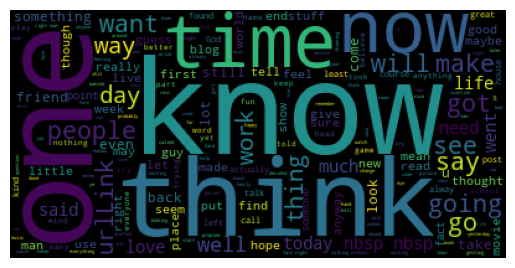

CPU times: user 2min, sys: 4.63 s, total: 2min 5s
Wall time: 2min 7s


In [8]:
%%time
text = list(df[df["gender"] == 'male'].text.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [1]:
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_sm

2022-11-23 18:13:27.865306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 11.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
2022-11-23 18:13:42.910820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.7 MB/s eta 0:00:0000:0100:01
✔ Download and install

In [79]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [102]:
df['date'][0:5].str.split(',').to_list()

[['14', 'May', '2004'],
 ['13', 'May', '2004'],
 ['12', 'May', '2004'],
 ['12', 'May', '2004'],
 ['11', 'June', '2004']]

In [107]:
len(df.index)

681284

In [ ]:
def soiac(df):
    liste=[]
    for row in tqdm(len(df.index)):
        sign_row=df['sign'][row]
        sign_rmm=df['MM'][row]
        sign_dd=df['DD'][row]
        sign_yy=df['YYY'][row]
        sign_yy=df['YYY'][row]
        if sign_row.lower() == 'aries':
            if sign_rmm.lower()=='april':
                if sign_dd<20:
                    liste.append(sign_yy-)
            elif sign_rmm.lower()=='march':

            else: 

        elif sign_row == 'Taurus':

        elif sign_row == 'Gemini':

        elif sign_row == 'Cancer':

        elif sign_row == 'Leo':

        elif sign_row == 'Virgo':

        elif sign_row == 'Libra':

        elif sign_row == 'Scorpio':

        elif sign_row == 'Sagittarius':

        elif sign_row == 'Capricorn':

        elif sign_row == 'Aquarius':

        elif sign_row == 'Pisces':



In [103]:
df[['DD', 'MM','YYYY']]=df['date'].str.split(',').to_list()

In [104]:
df.head(5)

,id,gender,age,topic,sign,date,text,DD,MM,YYYY
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",14,May,2004
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,13,May,2004
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,12,May,2004
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,12,May,2004
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,11,June,2004


In [7]:
import spacy


/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-23 18:32:14.866478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
df_pip['word_tokenize_without_stopwords_port'][0]

['info',
 'found',
 '(',
 '+/-',
 '100',
 'page',
 '4.5',
 'mb',
 '.pdf',
 'file',
 ')',
 'wait',
 'until',
 'team',
 'leader',
 'process',
 'learn',
 'html',
 '.']

In [76]:
for x in tqdm(df_pip['text'][0:3].tolist()):
    print(x)

100%|██████████| 3/3 [00:00<00:00, 37008.56it/s]

info has been found (+/- 100 pages and 4.5 mb of .pdf files) now i have to wait untill our team leader has processed it and learns html.
these are the team members: drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering (me) urllink mail
in het kader van kernfusie op aarde: maak je eigen waterstofbom how to build an h-bomb from: ascott@tartarus.uwa.edu.au (andrew scott) newsgroups: rec.humor subject: how to build an h-bomb (humorous) date: 7 feb 1994 07:41:14 gmt organization: the university of western australia original file dated 12th november 1990. seemed to be a transcript of a 'seven days' article. poorly formatted and corrupted. i have added the text between 'examine under a microscope' and 'malleable like gold' as it was missing. if anyone has the full text please distribute. i am not responsible for the accuracy of this information. converted to html by dionisio@infinet.com 11/13/98. (did a little spell-checking and some minor edits too.) stolen from urllink ht

In [64]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [73]:
def pos(df,column):
    nlp = spacy.load('en_core_web_sm')
    elements=[]
    for x in tqdm(df[column].to_list()):
        doc = nlp(x)
        el=[]
        for token in doc:
            el.append(token.pos_)
        elements.append(el)


In [85]:
df['pos']=pos(df,'text')

  0%|          | 132/681284 [00:08<12:09:56, 15.55it/s]


KeyboardInterrupt: 

In [ ]:
df.head(3)

In [23]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(df_pip['text'][0])
print(nlp.pipe_names)
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_, token.dep_, token.head.text)
spacy.displacy.render(doc, jupyter=True)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
info NOUN nsubjpass found
has AUX aux found
been AUX auxpass found
found VERB ROOT found
( PUNCT punct found
+ PROPN cc pages
/- SYM nmod pages
100 NUM nummod pages
pages NOUN appos info
and CCONJ cc pages
4.5 NUM nummod mb
mb NOUN conj pages
of ADP prep mb
.pdf ADJ amod files
files NOUN pobj of
) PUNCT punct found
now ADV advmod have
i PRON nsubj have
have VERB ROOT have
to PART aux wait
wait VERB xcomp have
untill ADV advmod processed
our PRON poss leader
team NOUN compound leader
leader NOUN nsubj processed
has AUX aux processed
processed VERB ccomp wait
it PRON dobj processed
and CCONJ cc processed
learns VERB conj processed
html PROPN dobj learns
. PUNCT punct have


In [12]:
for ent in doc.ents:
    print(ent.text, ent.label_)

info ORG
100 CARDINAL
4.5 CARDINAL


In [13]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print("{:<12}{:<10}{:<10}".format(token_text, token_pos, token_dep))

info        NOUN      nsubjpass 
has         AUX       aux       
been        AUX       auxpass   
found       VERB      ROOT      
(           PUNCT     punct     
+           PROPN     cc        
/-          SYM       nmod      
100         NUM       nummod    
pages       NOUN      appos     
and         CCONJ     cc        
4.5         NUM       nummod    
mb          NOUN      conj      
of          ADP       prep      
.pdf        ADJ       amod      
files       NOUN      pobj      
)           PUNCT     punct     
now         ADV       advmod    
i           PRON      nsubj     
have        VERB      ROOT      
to          PART      aux       
wait        VERB      xcomp     
untill      ADV       advmod    
our         PRON      poss      
team        NOUN      compound  
leader      NOUN      nsubj     
has         AUX       aux       
processed   VERB      ccomp     
it          PRON      dobj      
and         CCONJ     cc        
learns      VERB      conj      
html      

In [14]:
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_, ent.start, ent.end)

info ORG 0 1
100 CARDINAL 7 8
4.5 CARDINAL 10 11


In [18]:

pa=doc[10:12]

In [19]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER': '4.5'}, {'LOWER': 'mb'}]
matcher.add('IPHONE_PATTERN', [pattern])

In [20]:
doc = nlp("New 4.5 mb release date leaked")

# Call the matcher on the doc
matches = matcher(doc)
matches

[(9528407286733565721, 1, 3)]

In [21]:
doc[matches[0][1]:matches[0][2]]

4.5 mb

In [22]:
doc[2].vector

array([ 0.32346448, -0.75802267, -0.86565673,  0.05948672,  0.31642947,
       -0.49349922, -0.7576637 ,  0.46886748,  0.15378296,  0.04416066,
        1.317363  ,  0.95489556,  0.04193828, -0.81682605, -0.31076568,
       -0.44919544,  1.0660212 , -1.0216273 , -0.16042179,  0.02257061,
       -0.41444176, -1.0168364 , -0.5980088 , -0.23305613, -1.2680368 ,
        0.35109687, -0.602389  ,  1.1203878 ,  0.93405807,  0.2803774 ,
       -0.17225337,  1.0805807 ,  0.29955092, -0.7440382 ,  1.2355831 ,
       -0.49896055, -0.71259326,  0.8331603 , -0.03125942,  0.12103164,
       -0.05085076, -0.02182707, -0.23384717, -1.9290917 ,  0.11275727,
        1.0829529 ,  0.3506788 , -0.29245952, -1.0332326 , -0.7760784 ,
       -0.10240144,  1.2189645 , -0.5599475 , -0.93662995, -0.5174212 ,
       -0.9503219 ,  1.0383563 ,  0.14987382, -1.6652291 , -0.12564604,
       -1.2966841 ,  0.1979518 ,  0.3156815 ,  0.68120825,  0.4700474 ,
       -0.6557087 ,  0.1093822 , -0.02113748,  0.4187101 , -0.52

In [ ]:
import spacy

# nlp = spacy.load("en_core_web_md")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

In [51]:
nlp = spacy.load('en_core_web_sm')
# Add the component first in the pipeline
#nlp.add_pipe("tagger", first=True)

# Process a text
doc = nlp("I like to eat red apples in Big Apple.")
#tagger = nlp.add_pipe("tagger", first=True)
# This usually happens under the hood
print([(ent.text, ent.label_) for ent in doc.ents])
for x in doc.spans:
    print(x)

[('Big Apple', 'ORG')]


In [57]:
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')
df['Text_spacy'] = [d for d in tqdm(nlp.pipe(df['text']))]
df.head(5)


111104it [49:17, 37.56it/s] 


KeyboardInterrupt: 

In [58]:
df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [46]:
from langdetect import detect

In [50]:
liste_lang=[]
for text in tqdm(df['text']):
    try: 
        liste_lang.append(detect(str(text)))
    except:
        liste_lang.append('NaN')

100%|██████████| 681284/681284 [55:51<00:00, 203.29it/s]  


In [54]:
liste_lang

['en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',

In [52]:
df['lang']=liste_lang
df.to_csv('data/df_lang.csv')

In [57]:
df[df.lang=='en'].to_csv('data/df_eng.csv')